# The GroupBy
The groupby() function in Pandas is used to split data into groups based on some criteria, apply a function to each group independently, and combine the results into a new data structure. This is particularly useful for analyzing and aggregating data. The operation can be split into three steps:

- Splitting: The data is split into groups based on the specified column(s). This creates a GroupBy object.
- Applying: A function (e.g., mean, sum, count) is applied independently to each group.
- Combining: The results of the function applied to each group are combined into a single result (e.g., a DataFrame or Series).

The format of command is: **df.groupby("column_name").aggregation_function()**

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
df= pd.read_csv("product_data.csv")
print(df.head())
df.dtypes


   ProductID      ProductName        Category  Price  CustomerRating  \
0          1     Smartphone X     Electronics  500.0             4.2   
1          2   Fashion Jacket        Clothing   80.0             4.5   
2          3  Kitchen Blender  Home & Kitchen  120.0             3.8   
3          4    Running Shoes          Sports   60.0             4.0   
4          5           LED TV     Electronics  700.0             4.3   

  PromotionType CustomerAge  ShippingTime  CustomerSatisfaction ShippingDate  
0      Discount       Young             2                     4    2/15/2022  
1  Bundle Offer       Adult             3                     5    8/20/2021  
2           NaN      Senior             4                     3    5/10/2022  
3      Discount       Young             2                     4    11/3/2022  
4           NaN       Adult             3                     4    6/27/2021  


ProductID                 int64
ProductName              object
Category                 object
Price                   float64
CustomerRating          float64
PromotionType            object
CustomerAge              object
ShippingTime              int64
CustomerSatisfaction      int64
ShippingDate             object
dtype: object


# Questions for GroupBy and Relevant Plots

1. **What is the average price of products in each category?**
   - Group the data by 'Category' and calculate the mean of the 'Price'.
   - **Plot:** Bar chart showing the average price for each product category.


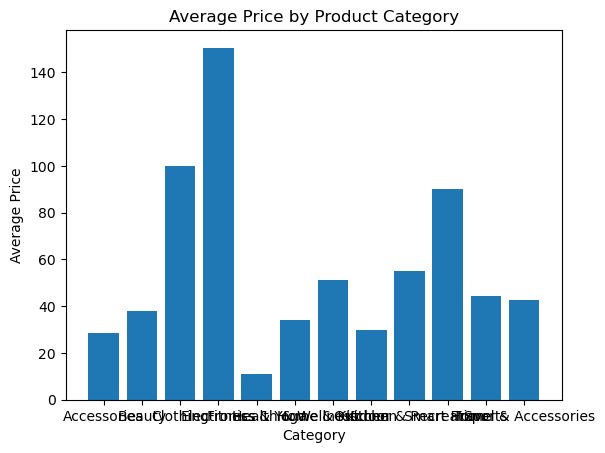

In [9]:
avg_price_by_category = df.groupby("Category")["Price"].mean()
plt.figure()
plt.bar(avg_price_by_category.index, avg_price_by_category.values)
plt.xlabel("Category")
plt.ylabel("Average Price")
plt.title("Average Price by Product Category")
plt.show()


2. **How does the average customer rating vary by product category?**
   - Group the data by 'Category' and calculate the mean of 'CustomerRating'.
   - **Plot:** Bar chart to show the average customer ratings for each category.



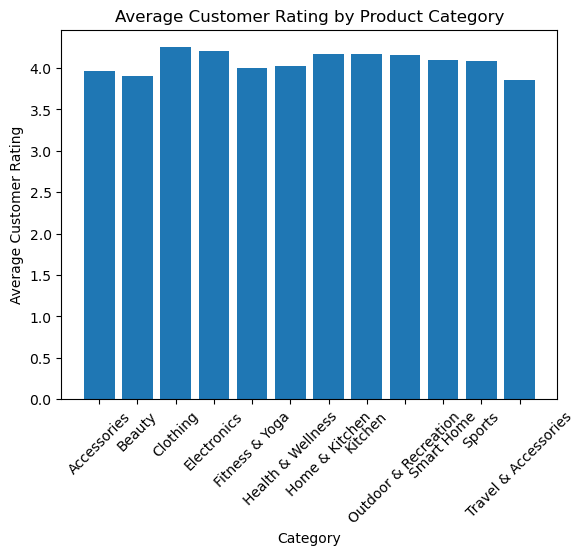

In [11]:
avg_rating_by_category = df.groupby("Category")["CustomerRating"].mean()
plt.figure()
plt.bar(avg_rating_by_category.index, avg_rating_by_category.values)
plt.xlabel("Category")
plt.ylabel("Average Customer Rating")
plt.title("Average Customer Rating by Product Category")
plt.xticks(rotation=45)
plt.show()

3. **What is the total number of products shipped per promotion type?**
   - Group the data by 'PromotionType' and count the number of products in each promotion category.
   - **Plot:** Bar chart to show the total number of products shipped under each promotion type.



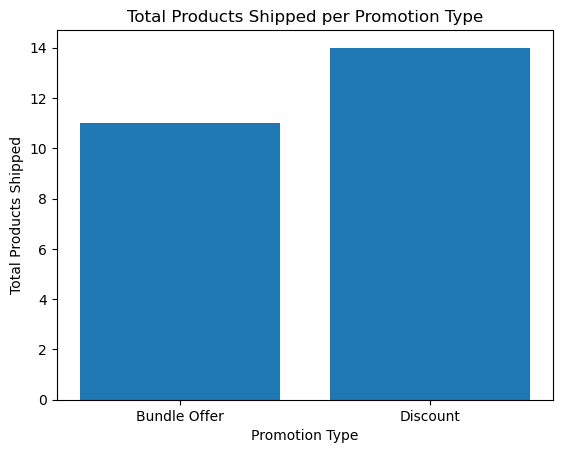

In [12]:
products_per_promo = df.groupby("PromotionType")["ProductID"].count()
plt.figure()
plt.bar(products_per_promo.index, products_per_promo.values)
plt.xlabel("Promotion Type")
plt.ylabel("Total Products Shipped")
plt.title("Total Products Shipped per Promotion Type")
plt.show()

4. **What is the average shipping time for each customer age group?**
   - Group the data by 'CustomerAge' and calculate the mean of 'ShippingTime'.
   - **Plot:** Bar chart to visualize the average shipping time for each customer age group.



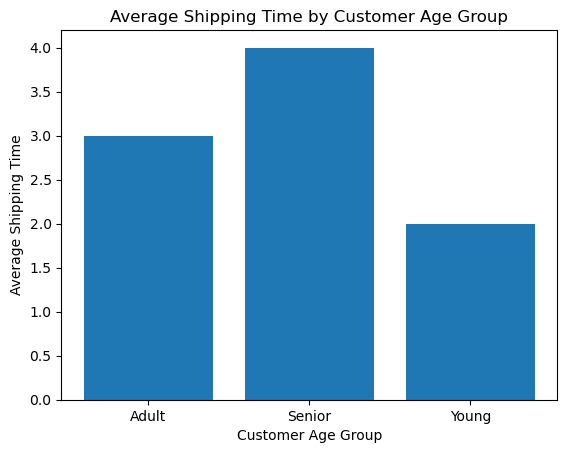

In [13]:
avg_shipping_by_age = df.groupby("CustomerAge")["ShippingTime"].mean()
plt.figure()
plt.bar(avg_shipping_by_age.index, avg_shipping_by_age.values)
plt.xlabel("Customer Age Group")
plt.ylabel("Average Shipping Time")
plt.title("Average Shipping Time by Customer Age Group")
plt.show()

5. **How does customer satisfaction differ across product categories?**
   - Group the data by 'Category' and calculate the mean of 'CustomerSatisfaction'.
   - **Plot:** Bar chart to compare average customer satisfaction across different categories.



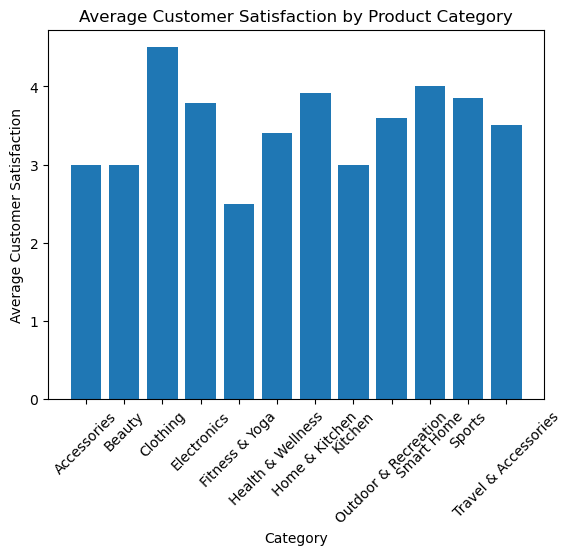

In [15]:
avg_satisfaction_by_category = df.groupby("Category")["CustomerSatisfaction"].mean()
plt.figure()
plt.bar(avg_satisfaction_by_category.index, avg_satisfaction_by_category.values)
plt.xlabel("Category")
plt.ylabel("Average Customer Satisfaction")
plt.title("Average Customer Satisfaction by Product Category")
plt.xticks(rotation=45)
plt.show()

6. **What is the distribution of products by promotion type within each category?**
   - Use a combination of groupby on both 'Category' and 'PromotionType' and count the occurrences.
   - **Plot:** Stacked bar chart to display the number of products in each category, segmented by promotion type.



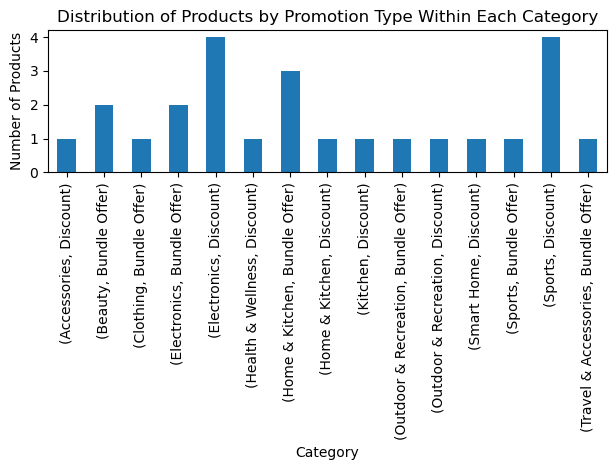

In [18]:
promotion_distribution = df.groupby(["Category", "PromotionType"])["ProductID"].count()
promotion_distribution.plot(kind="bar", stacked=True)

plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.title("Distribution of Products by Promotion Type Within Each Category")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

7. **Which customer age group is associated with the highest average price of purchased products?**
   - Group by 'CustomerAge' and calculate the mean of 'Price'.
   - **Plot:** Bar chart to compare the average price of products purchased by different customer age groups.



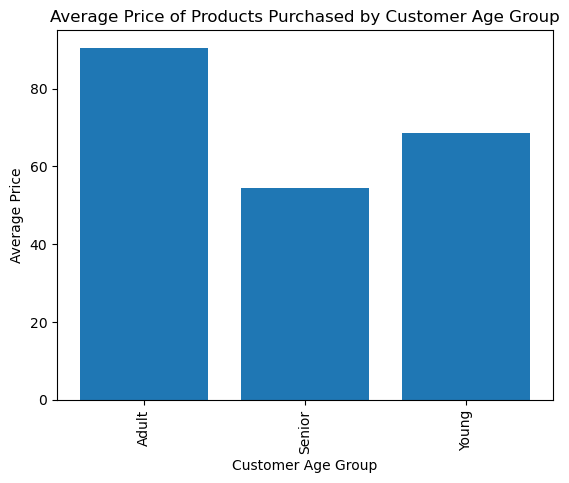

In [19]:
avg_price_by_age = df.groupby("CustomerAge")["Price"].mean()
highest_age_group = avg_price_by_age.idxmax()
highest_value = avg_price_by_age.max()
plt.figure()
plt.bar(avg_price_by_age.index, avg_price_by_age.values)
plt.xlabel("Customer Age Group")
plt.ylabel("Average Price")
plt.title("Average Price of Products Purchased by Customer Age Group")
plt.xticks(rotation=90)
plt.show()

8. **What is the trend in customer satisfaction over time?**
   - Extract the month or year from 'ShippingDate' and group by it to calculate the average 'CustomerSatisfaction'.
   - **Plot:** Line plot to show the trend of customer satisfaction over the extracted time periods (monthly or yearly).

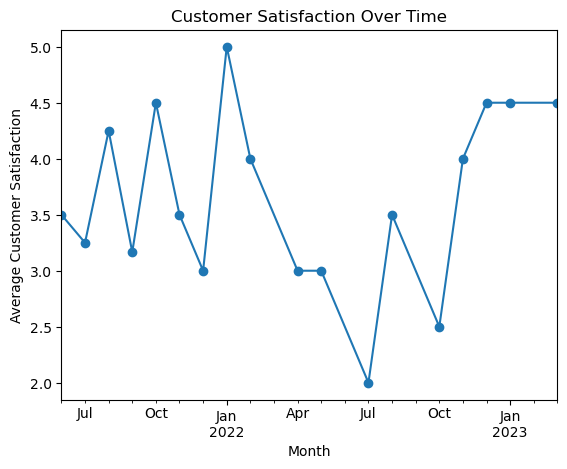

In [24]:
df["ShippingDate"] = pd.to_datetime(df["ShippingDate"])
df["Month"] = df["ShippingDate"].dt.to_period("M")
avg_satisfaction = df.groupby("Month")["CustomerSatisfaction"].mean()
plt.figure()
avg_satisfaction.plot(marker='o')
plt.xlabel("Month")
plt.ylabel("Average Customer Satisfaction")
plt.title("Customer Satisfaction Over Time")
plt.show()